# 심부전증 분류 예측
## 데이터 소개
### 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.

### 다음 1개의 csv 파일을 사용합니다.<br>
heart_failure_clinical_records_dataset.csv

### 각 파일의 컬럼은 아래와 같습니다.

- age: 환자의 나이
- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- ejection_fraction: 박출계수 (%)
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- platelets: 혈소판 수 (kiloplatelets/mL)
- serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
- serum_sodium: 혈중 나트륨 레벨 (mEq/L)
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- time: 관찰 기간 (일)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
<br>
<br>
#### 크레아틴키나제
* 골격근이나 심근 등의 근유세포 에너지 대사에 중요한 역할을 하는 효소의 일종, 골격근, 심근, 평활근 및 뇌에 고농도로 분포되어 있고, 기타 조직과 장기에는 거의 없음, 따라서 혈청 CK의 측정은 근육의 질환이나, 심근경색의 조기진단에 유용한 검사
* 이상치와 대책 : 
CK 수치는 심한 운동을 한 후, 젊고 건장한 남성, 임신 후기, 출산 전후에 약간 증가하는 경향이 있으므로 검사 전에는 평소에 하던 운동도 가능하면 삼가는 것이 좋습니다.
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

## Step 1. 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/21.09.14 학습자료/heart_failure_clinical_records_dataset.csv')

## Step 2. EDA 및 데이터 기초 통계 분석
### 데이터프레임의 각 컬럼 분석하기

In [3]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 head()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# info() Null 값 확인, 데이터 각 필드 특징값(타입) 확인
# 13개의 수치형 컬럼으로 구성되어 별도의 형태변환은 필요하지 않음
# 1-빈혈, 3-당뇨, 5-혈압, 9-성별, 10-흡연, 12-사망여부 = 범주형 데이터 셋
# 12번 사망여부는 y레이블값으로 처리해야 하므로 별도의 변환 X(0과 1로 구성)
# 그외 1, 3, 5, 9 필드는 더미변수 처리여부를 결정해야 함
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# describe() 기술통계 확인, 분포도 확인
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [18]:
df.corr()
# 시각화 필요

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


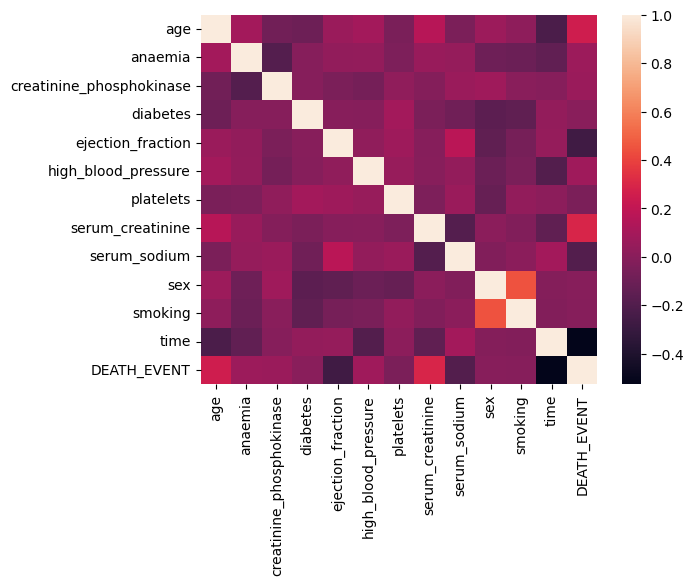

In [71]:
sns.heatmap(df.corr())
plt.show()
# 나이, 박출계수, 혈중크레아틴레벨, 혈중 나트륨 레벨 이 사망율과 관련이 높음

In [6]:
# 미션에 없음
df[df['age']>90]
# 예를 들어 고객의 나이가 대부분 90이하라면 이 데이터 셋은 제거하고 작업해도 됨

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
26,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


In [7]:
# na값 확인
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

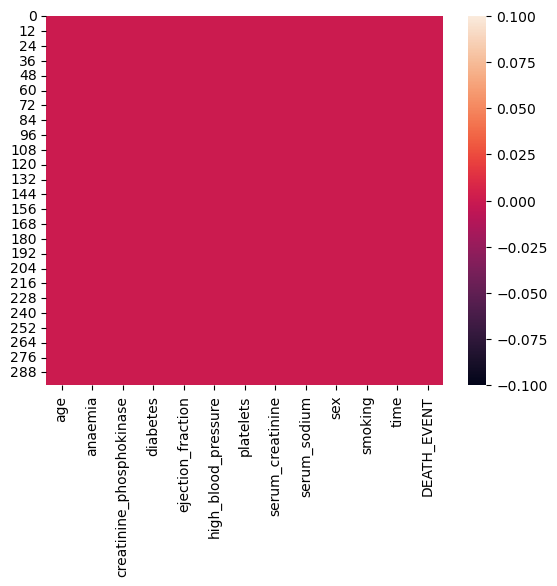

In [8]:
# na 시각화
sns.heatmap(df.isnull())        # cbar=False로 우측 바를 없앨수 있음
plt.show()
# 결측치 없음

## 문제 5. 수치형 데이터의 히스토그램 그리기

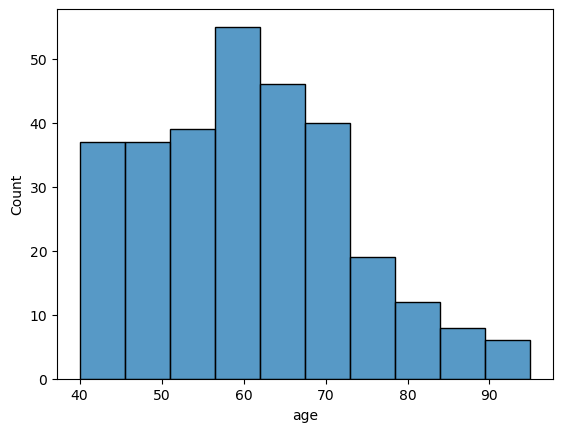

In [9]:
# df.describe() 에서 age에 대한 해석에 도움 됨.
sns.histplot(data=df, x='age')
plt.show()
# 70대 이상 데이터가 부족함

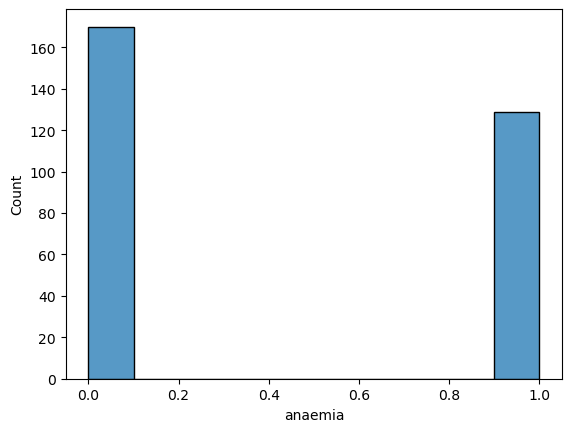

In [10]:
sns.histplot(data=df, x='anaemia')
plt.show()
# 빈혈은 정상인 사람 비중이 많음

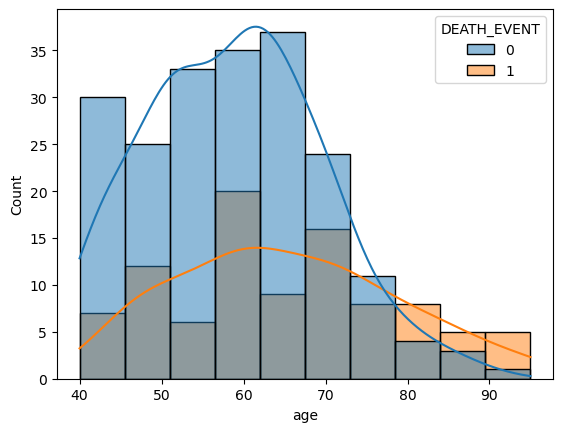

In [11]:
# 미션, 해석해야 함 
# 해석할때 groupby로 수치값으로 표현해서 작업해보면 더 이해가 빠름
sns.histplot(data=df, x='age', hue='DEATH_EVENT', kde=True) #  kde 정규분포
plt.show()
# 해당 데이터는 300명에 대한 자료로 추가 데이터가 더 필요할 것으로 보임, 생존자와 사망자간의 상관관계 분석이 애매하다고 판단되고, 70세 이상의 인원이 상대적으로 적음
# 사망자의 그래프를 보면 나이의 중앙에 밀집 되어 있으나 나이대별 사망율로 보면 나이가 많을 수록 사망확률이 높아보임
# 나이 외적으로 연관성이 높아보이는 [박출계수, 혈중크레아틴레벨, 혈중 나트륨 레벨 분석] 필요해 보임

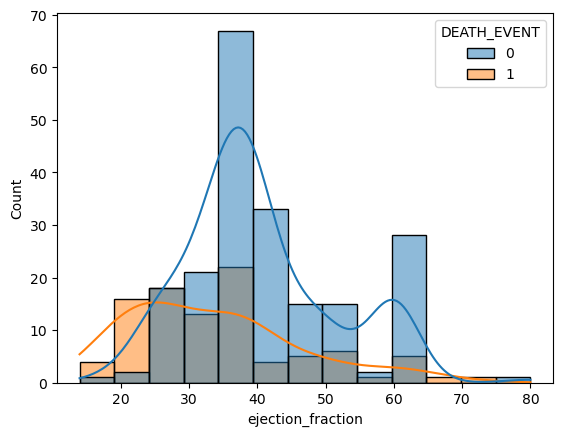

In [106]:
# 박출계수
sns.histplot(data=df, x='ejection_fraction', bins=13, hue='DEATH_EVENT', kde=True) #  kde 정규분포
plt.show()
# 박출계수가 낮을수록 사망율이 증가함

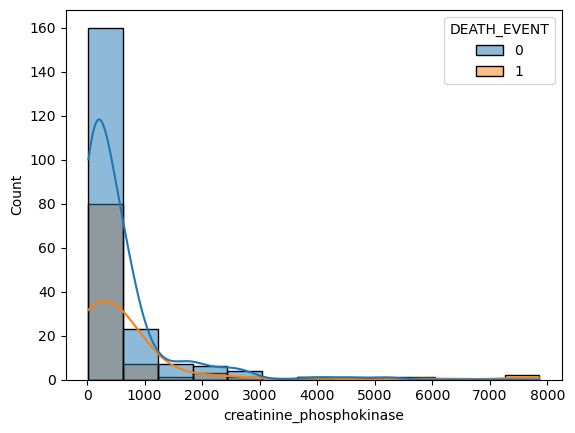

In [126]:
# 크레아틴키나제 검사결과
sns.histplot(data=df, x='creatinine_phosphokinase', bins=13, hue='DEATH_EVENT', kde=True) #  kde 정규분포
plt.show()

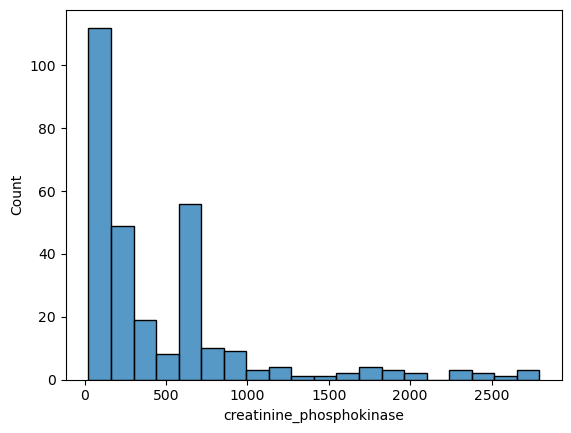

In [132]:
# 크레아틴 키나제 수치 3000 이하인 경우
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])
plt.show()

In [125]:
df.pivot_table('DEATH_EVENT','serum_creatinine')
# 혈중 크레아틴 레벨이 1.8 보다 클 경우 사망확률이 압도적으로 높아짐
# 일반적인 크레아틴 수치 남성 : 0.7~1.3 / 여성 : 0.5~1.1
# 1.5 이상이면 문제가 있다고 봄, 단 신장이 하나인 경우 1.8~1.9 나올수 있음

,DEATH_EVENT
serum_creatinine,
0.50,0.000000
0.60,0.500000
0.70,0.052632
0.75,0.000000
0.80,0.041667
0.90,0.156250
1.00,0.300000
1.10,0.281250
1.18,0.000000


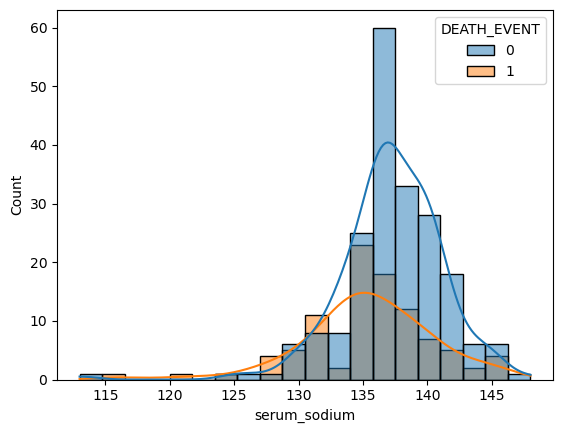

In [82]:
# 혈중 나트륨 레벨
sns.histplot(data=df, x='serum_sodium', hue='DEATH_EVENT', kde=True) #  kde 정규분포
plt.show()
# 정상수치 : 1L / 135 - 145mmol

In [100]:
(df.serum_sodium>=145).value_counts(), (df.serum_sodium<=135).value_counts(), (df.serum_sodium<=130).value_counts()

(False    288
 True      11
 Name: serum_sodium, dtype: int64,
 False    200
 True      99
 Name: serum_sodium, dtype: int64,
 False    277
 True      22
 Name: serum_sodium, dtype: int64)

In [87]:
df.pivot_table('DEATH_EVENT', 'serum_sodium')
# 정상수치 : 1L / 135 - 145mmol
# 130 이하 (22) 데이터가 145이상 (11), 일 경우 사망 확률이 높음

,DEATH_EVENT
serum_sodium,
113,0.000000
116,1.000000
121,1.000000
124,1.000000
125,0.000000
126,0.000000
127,1.000000
128,0.500000
129,1.000000


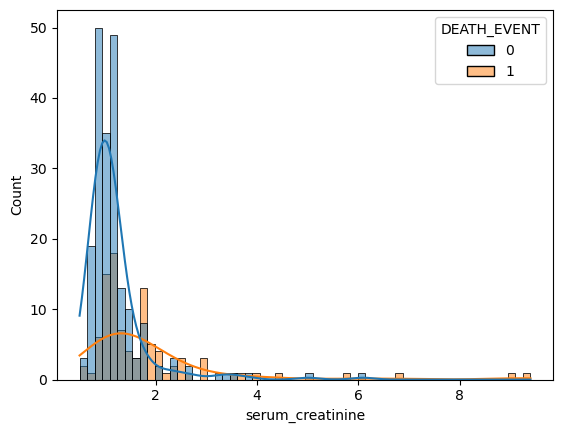

In [134]:
# 혈중 크레아틴 레벨
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', kde=True) #  kde 정규분포
plt.show()
# 정상수치 : 1L / 135 - 145mmol

In [136]:
df.pivot_table('DEATH_EVENT', 'serum_creatinine', 'sex') # sex 0 여성 / 1 남성
# 정상수치 : 남- 0.7~1.3 / 여-0.5~1.1
# 여성의 경우 1.5이상이 될경우 사망률이 높고 남성의 경우 1.83 이상일 경우 사망률이 높음

sex,0,1
serum_creatinine,,
0.50,0.000000,NaN
0.60,1.000000,0.333333
0.70,0.000000,0.071429
0.75,0.000000,NaN
0.80,0.000000,0.076923
0.90,0.071429,0.222222
1.00,0.350000,0.266667
1.10,0.200000,0.296296
1.18,0.000000,0.000000


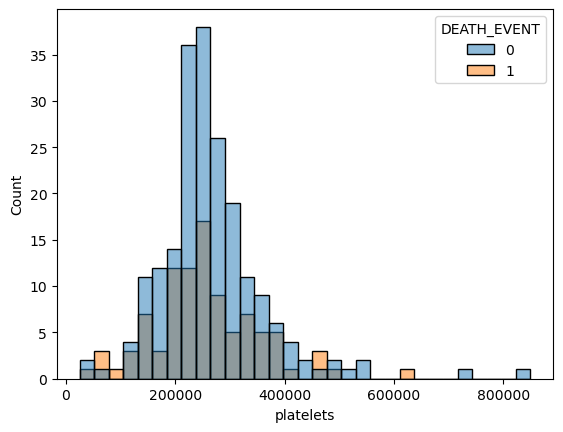

In [115]:
# 혈소판 수
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')
plt.show()

# 혈소판의 정상수치 : 150000 ~ 450000
# 정상수치 이내에 사망자가 많이 분포되어 있는것으로 보아 혈소판과 심부전증의 상관관계는 없는 것으로 추정

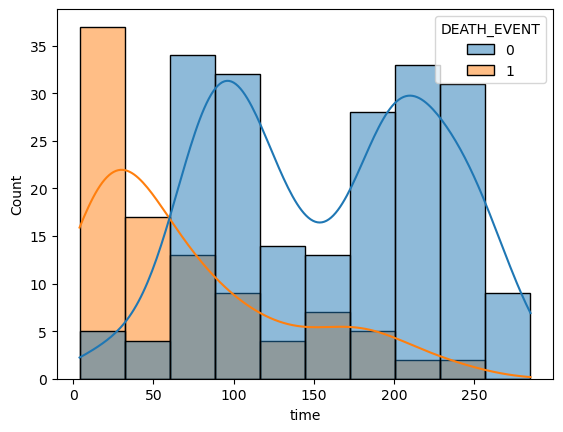

In [117]:
# 관찰기간
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)
plt.show()
# 나이가 많을수록, 심부전증의 증상이 심할경우, 합병증 등이 있을 경우 관찰기간 대비 빠르게 사망할 가능성이 높을 수 있음

In [122]:
df.pivot_table('DEATH_EVENT', 'time').value_counts()
# 130 이하 (22) 데이터가 145이상 (11), 일 경우 사망 확률이 높음

DEATH_EVENT
0.000000       79
1.000000       51
0.500000        8
0.666667        4
0.200000        3
0.333333        2
0.800000        1
dtype: int64

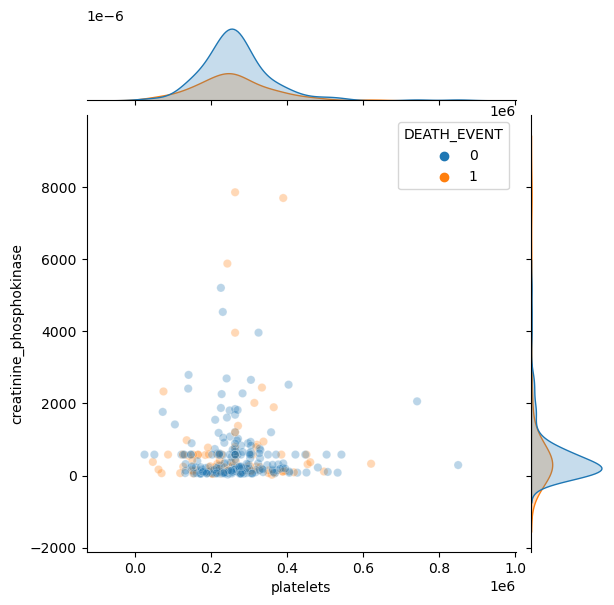

In [116]:
# 혈소판수와 크레아틴키나제 검사 결과와의 생사여부 상관관계도
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)
plt.show()

# 크레아틴 키나아제 검사결과가 6000을 넘을 경우 사망율이 올라가고, 2000 ~ 0 사이에도 사망율이 높음
# 사망자수가 혈소판수와는 관계없이 고르게 분포
# 분포도가 우상향이 아닌것으로 보아 관련도의 신뢰성이 떨어짐

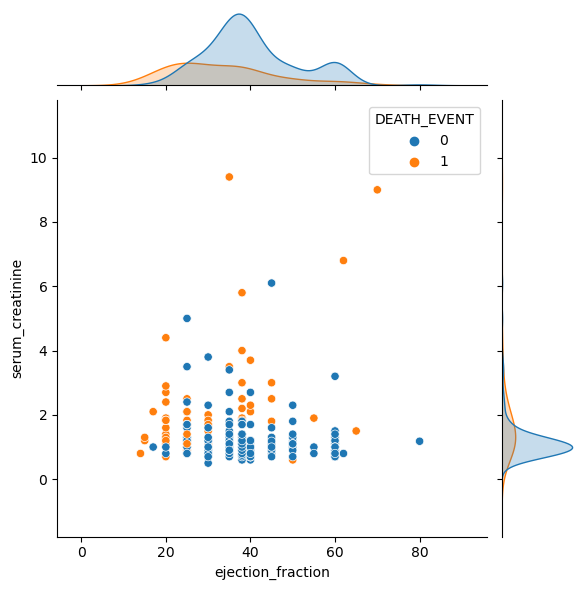

In [133]:
# ejection_fraction: 박출계수 (%), serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)

sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')
plt.show()

# 박출계수와 혈중크레아틴 레벨이 높을경우 사망률이 높으나 자료수가 부족하고 전반적인 그림이 우상향이 아니어서 관련도의 신뢰성이 떨어짐

## boxplot - 이상치 확인

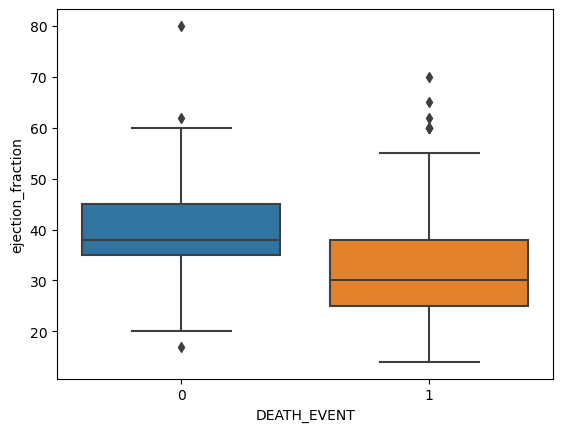

In [137]:
# 사망여부와 박출계수 박스플롯을 보면 사망여부에 따라 각각 이상치가 보임
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.show()

# 박출계수가 낮은사람은 사망확률이 높음

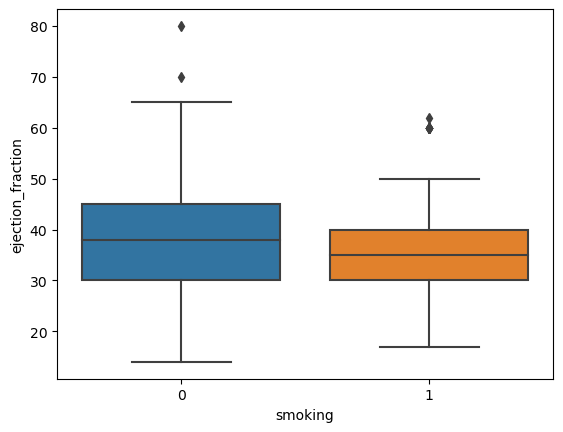

In [139]:
# 흡연여부에 따른 박출계수 박스플롯
sns.boxplot(x='smoking', y='ejection_fraction', data=df)
plt.show()

# 흡연할 경우 박출계수가 낮아지는 것 으로 보임

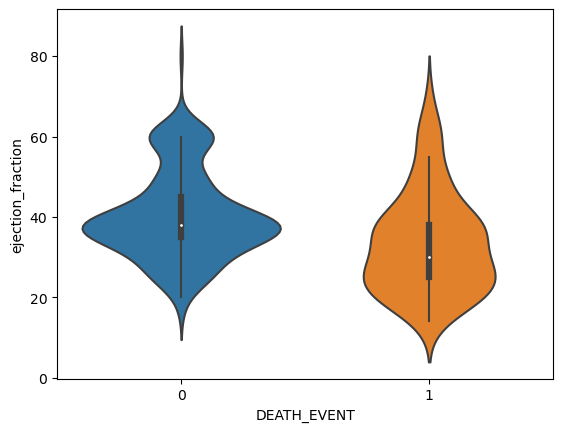

In [141]:
# 사망여부에 따른 박출계수 바이올린플롯
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.show()

# 분포도를 볼수 있어 좋음
# 박출계수가 40 이하일 경우 사망율이 높은것으로 보임

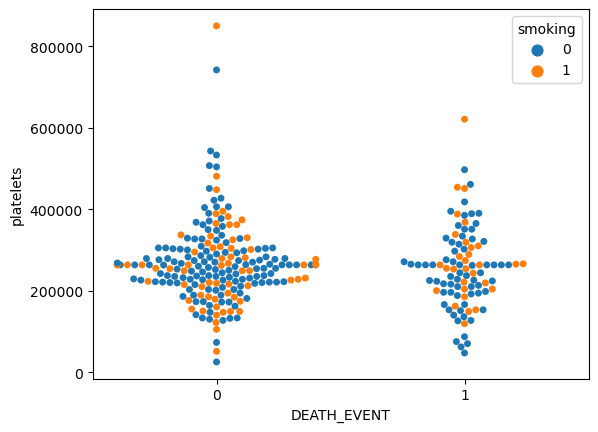

In [143]:
# 군집 플롯을 통한 혈소판수와 흡연여부에 따른 사망율
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)
plt.show()

# 흡연여부는 고루 분포된 것으로 보아 심부전증으로 인한 사망과 큰 연관이 없는 것으로 보임
# 사망자와 생존자의 수차이가 있지만 모양을 보면 비슷한 모양으로 보여 관계가 없는것으로 추정 됨

## Step 3. 모델 학습을 위한 데이터 전처리
### StandardScaler를 이용하여 데이터 전처리하기

In [12]:
from sklearn.preprocessing import StandardScaler
# 값의 범위가 평균 0, 분산 1이 될 수 있도록 값을 일정한 범위로 조정, 
# x값의 값이 크면 y값에 영향을 많이줌, 그러한 일이 없게 값의 단위를 같게 조정.


In [13]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기

# 1-빈혈, 3-당뇨, 5-혈압, 9-성별, 10-흡연, 12-사망여부 = 범주형 데이터 셋
# 12번 사망여부는 y레이블값으로 처리해야 하므로 별도의 변환 X(0과 1로 구성)
# 그외 1, 3, 5, 9 필드는 더미변수 처리여부를 결정해야 함

X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [14]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)                 # 훈련
X_scale = scaler.transform(X_num) # 데이터 변환
# X_scale = scaler.fit_transform(X_num) # 같이 할수도 있음

# 스케일링된 데이터 셋을 데이터프레임으로 만들고 범주형자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
X_scale1 = pd.DataFrame(data = X_scale, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scale1, X_cat], axis=1)
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,0,0,0,1,1


### 학습데이터와 테스트데이터 분리하기

In [15]:
from sklearn.model_selection import train_test_split
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기
### Logistic Regression 모델 생성/학습하기

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# LogisticRegression 모델 생성/학습
# y결과 값이 0과 1의 두가지 값을 갖는 이항분류에 해당
np.unique(y)

array([0, 1], dtype=int64)

In [19]:
model_lr = LogisticRegression()     # 옵션 없음
model_lr.fit(X_train, y_train)

LogisticRegression()

### 모델 학습 결과 평가하기

In [28]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력하기

pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))
# recall(재현율) 생존자(0)는 0.92로 잘 맞으나, 사망자(1)에 대한 재현율은 0.35로 잘 안맞아, 결과값이 0.76으로 낮음

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



In [40]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

model_lr2 = LogisticRegression(penalty='l2', random_state=777, max_iter=100)
model_lr2.fit(X_train, y_train)

pred2 = model_lr2.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



###  XGBoost 모델 생성/학습하기

In [43]:
!pip install xgboost 

In [45]:
from xgboost import XGBClassifier
# XGBClassifier 모델 생성/학습
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

[10:53:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
#  1값이 예측이 잘 안되어 있음 그래서 1값 중 예측이 안맞는 것만 꺼내서 확인 해보려 함
pred = model_lr.predict(X_test)

cnt=0; tmpList=[]
for i, j in zip(y_test, pred):
    if i == j:
        tmpList.append({'y':i, 'pred':j, "re" : "O"})
    else:
        tmpList.append({'y':i, 'pred':j, "re" : "X"})

tmp = pd.DataFrame(tmpList)

tmp[(tmp['y'] == 1) & (tmp['re']=='X')].index

Int64Index([2, 8, 12, 14, 21, 45, 48, 49, 64, 65, 69, 72, 79, 82, 84, 86, 89], dtype='int64')

### 문제 12. 모델 학습 결과 평가하기

In [49]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90



### 문제 13. 특징의 중요도 확인하기

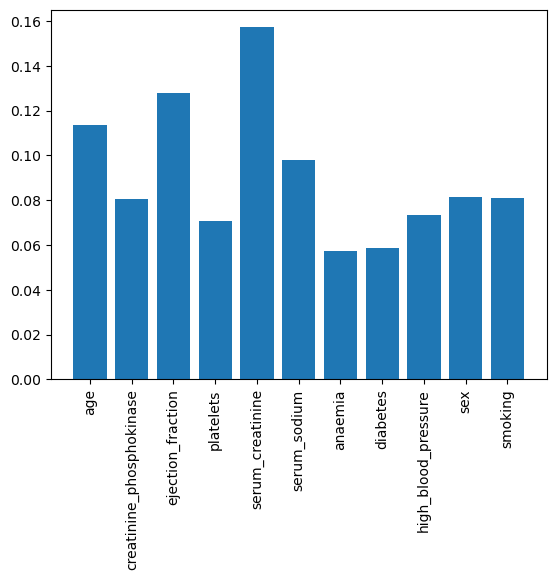

In [50]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# serum_creatinine: 혈중 크레아틴 레벨 (mg/dL), ejection_fraction: 박출계수 (%), age: 환자의 나이 가 높은 수치가 나옴

## Step5 모델 학습 결과 심화 분석하기
### Precision-Recall 커브 확인하기

- y축: Precision(정밀도)의 공식 찾기 T or F 실제값이 1인데 예측이 1 / (실제값이1인데 예측이 1 + 실제값이 1인데 예측이 0) 1이 되는 값
- 정확도 Accuracy : (참값이나올 경우의 수 / 모든 경우의 수)TruePositives + Truenegatives / TruePositives + Truenegatives + FalsePositives + FalseNegatives
- 정밀도/Precision : TP / TP+FP ; 모델이 Positive라고 예측한 것 중 실제로 Positive인 비율
- 재현율/Recall : TP / TP + FN ; 모델이 Positive라고 예측한 비율
- Precision-Recall Curve : Precision-Recall Curves는 Parameter인 Threshold를 변화시키면서 Precision과 Recall을 Plot 한 Curve
- Recall Curves는 X축으로는 Recall을, Y축으로는 Precision
-  Precision-Recall Curve는 단조함수가 아니어서 ROC Curve보다 직관적이지 못하다는 단점을 가짐

Precision-Recall Curve를 구체적으로 plot 하는 방법을 알아보겠습니다.
1. Probabillity (혹은 Score)를 기준으로 내림차순 정렬합니다.
2. Threshold를 가장 높은 Probability(or Scroe)로 정합니다.
3. Threshold 값에 따른 Model의 예측 값을 정합니다.<br>
   Threshold이상의 값이면 Positive, 미만이면 Negative로 예측합니다.
4. Recall과 Precision을 구해 Precision-Recall Curve에 Plot 합니다.
5. Threshold를 현재 Probability(or Scroe) 보다 한 단계 낮은 값으로 정하고 3번으로 돌아갑니다.<br>
   현재 Threshold보다 낮은 Probaility(or Scroe)가 없다면 종료합니다.

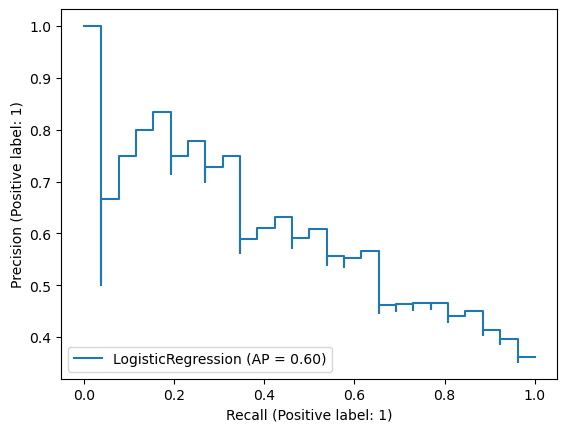

In [145]:
from sklearn.metrics import plot_precision_recall_curve
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
#plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)
plt.show()

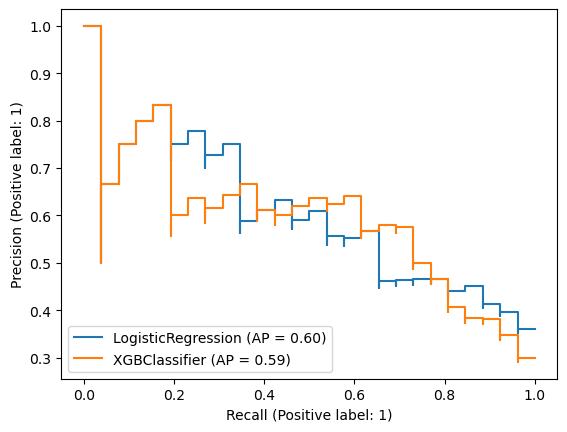

In [55]:
fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)
plt.show()

### ROC 커브 확인하기

ROC Curve를 그리는 방법을 이를 위해서 필요하다고 생각되는 False Positive Rate(FPR) 과 True Positive Rate(TPR), 
그리고 Threshold와  FPR와 TPR 의 관계를 먼저 알아보겠습니다.

FPR은 실제 Negative에서 모델이 Positive라고 예측한 비율을 뜻하며, 다음과 같이 표현합니다.
FPR = FP / TN + FP
 
TPR은 실제 Positive에서 모델이 Positive라고 예측한 비율을 뜻하며, 다음과 같이 표현합니다.
TPR = TP / TP + FN

ROC Curve 설명 및 특징
ROC Curves는 Parameter인 Threshold를 변화시키면서 FPR과 TPR을 Plot 한 Curve
ROC Curves는 X축으로는 FPR을, Y축으로는 TPR을 가짐
ROC Curve는 단조함수이기때문에 이러한 이유로 Precision-Recall Curve에 비해 직관적이라는 장점

ROC Curve를 구체적으로 plot 하는 방법을 알아보겠습니다.

1. Probabillity (혹은 Score - 꼭 확률이지 않아도 됩니다. non-thresholded decision values 면 상관없습니다. )를 기준으로 내림차순 정렬합니다.
2. Threshold를 가장 높은 Probability(or Scroe)로 정합니다.
3. Threshold 값에 따른 Model의 예측 값을 정합니다.<br>
   Threshold이상의 값이면 Positive, 미만이면 Negative로 예측합니다.
4. FPR과 TPR을 구해 ROC Curve에 Plot 합니다.
5. Threshold를 현재 Probability(or Scroe) 보다 한 단계 낮은 값으로 정하고 3번으로 돌아갑니다.<br>
   현재 Threshold보다 낮은 Probaility(or Scroe)가 없다면 종료합니다.

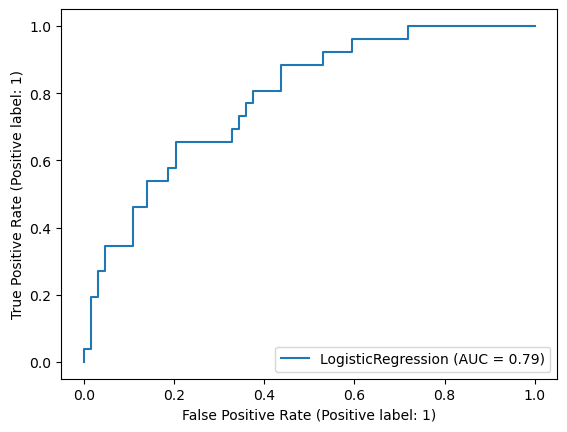

In [56]:
from sklearn.metrics import plot_roc_curve
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
#plot_roc_curve(model_xgb, X_test, y_test, ax=ax)
plt.show()

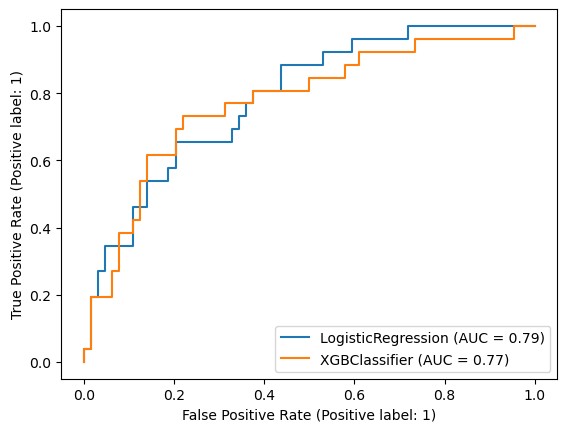

In [57]:
from sklearn.metrics import plot_roc_curve
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)
plt.show()